In [0]:
#import all libraries
import pandas as pd #extracts and loading data
from sklearn.datasets import load_iris #import iris dataset
from sklearn.tree import DecisionTreeClassifier #loads decision tree classifier
from sklearn.model_selection import train_test_split #to divide the data into test and train
import matplotlib.pyplot as plt #for plotting daigrams
from sklearn.metrics import accuracy_score #to test accuracy


In [0]:
#load and extract data with column name 
data=pd.DataFrame(data=load_iris()["data"],columns=load_iris()["feature_names"])

In [63]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
#we consider the target 
flower=load_iris()["target"]
flower

#here,0 setosa,1 versicolor , 2 virginice

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd18bc6fa58>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd18bc7c4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd18bc7cf28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd18bc7cba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd18bc6fd68>,
  <matplotlib.lines.Line2D at 0x7fd18bc7c128>]}

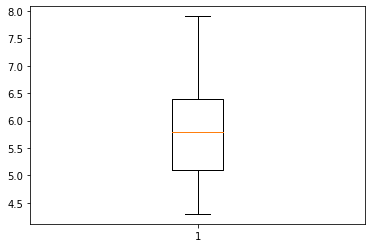

In [65]:
#graph shows sepal length max is approx 8 and min is approx 4.5,3rd qurtile is above 6.5,1st quartile is below 5
plt.boxplot(df["sepal length (cm)"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd18bc50b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd18bbdf550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd18bbdffd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd18bbdfc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd18bc50e10>,
  <matplotlib.lines.Line2D at 0x7fd18bbdf1d0>]}

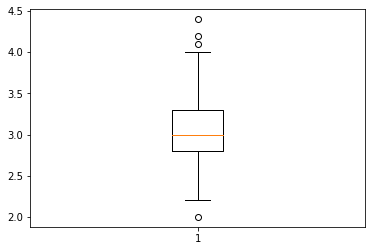

In [66]:
#the range is between 4 and 2
#few are out of range near 4.5
plt.boxplot(df["sepal width (cm)"])

In [67]:
#lets check stats of the dataset
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


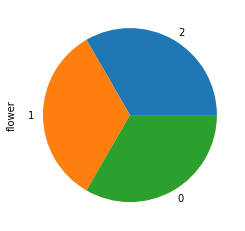

In [68]:
#to check if it has equal number of samples
df["flower"].value_counts().plot(kind="pie")

In [69]:
#copying data to new df for statistic purpose
df=data
#adding flower column into df(where flower has the type of flower value)
df["flower"]=flower
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [0]:
#divide the data into test and training 
#the maximum data is trained to recognize pattern and tested against the remaining 25%-30% data to check accuarcy
x_train,x_test,y_train,y_test=train_test_split(data,flower,test_size=.25)

In [71]:
#:train the decision tree model


#step1:initialize the classifier
cf=DecisionTreeClassifier()

#step2:feed the training data
#here x_train is   features,wheres as y_train are the type of flowers 
cf=cf.fit(x_train,y_train)

#step3:predict the outcome
pred=cf.predict(x_test)

#step4:test the accuracy
#this y_test is 30% test having original values against our predicted values
score=accuracy_score(y_test,pred)
print("Accuracy_score ",score)

Accuracy_score  1.0


In [0]:
#accuracy is 1 as we are using test data is from a part of training data 

In [0]:
#though the test_train_split shuffles the data while giving for training its possible sometime